*Project for the course in Microeconometrics, Summer 2019, Bonn University*

---

## Replication of Jason M. Lindo, Nicholas J. Sanders & Philip Oreopoulos (2010) <a class="tocSkip"> 

_Lindo, J. M., Sanders, N. J., & Oreopoulos, P. (2010). Ability, gender, and performance standards: Evidence from academic probation. American Economic Journal: Applied Economics, 2(2), 95-117._


---

In [71]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as plt

# Overview 

Lindo et al. (2010) examine the effects of academic probation on student outcomes using data from three campuses at a large Canadian university. Academic probation is a university policy that aims to imporove the performance of the lowest scoring students. If a student's grade point average (GPA) drops below a certain threshold, the student is placed on academic probabtion. The probation status serves as a warning and does not entail immediate consequences, however, if students fail to improve their grades during the following year, they face the threat of being suspended from university. In a more general sense, academic probation thus may offer insights into how agents respond to negative incentives and the threat of punishment in a real world context with high stakes. 

To estimate the causal impact of being placed on probation, Lindo et al. (2010) apply a **regression discontinuity design (RDD)** to data retrieved from three campuses a at large Canadian university. The RDD is motivated by isea that the students who score just above the threshold for being put on academic probation provide a good counterfactual to the 'treatment group' that scores just below the threshold and is put on academic probation. 

Observed outcomes:
* drop out rates
* Subsequent performance
* Graduation rates

Covariates:
* Gender
* High school performance
* Native language 
* Age at entry
* Credits attempted in 1st year
* Birthplace
* Campus

# Causal Graphs

wip

# Study replication

In [35]:
data = pd.read_stata('data/data_for_analysis.dta')
data.shape

(44362, 86)

## Data & Descriptive Statistics
Overview of all variables in the provided dataset:

In [36]:
columnlist = data.columns
print(columnlist)

Index(['credits1', 'credits2', 'credits_earned1', 'credits_earned2',
       'session1', 'winter_ac_standing', 'GPA_year1', 'GPA_year2',
       'CGPA_year1', 'CGPA_year2', 'totcredits_year1', 'totcredits_year2',
       'goodstanding_year1', 'goodstanding_year2', 'winter_ac_stand_year1',
       'winter_ac_stand_year2', 'fallreg_year1', 'fallreg_year2',
       'act_fallreg_year1', 'act_fallreg_year2', 'summerreg_year1',
       'summerreg_year2', 'sex', 'mtongue', 'identifier', 'age_at_entry',
       'bpl_north_america', 'bpl_asia', 'canadian', 'bpl_other', 'firstyear',
       'yearstodegree', 'gradin4', 'gradin5', 'gradin6', 'gradin4orcont',
       'cumcredits1', 'cumcredits2', 'prog_science', 'prog_socsci_bus',
       'prog_socscihum', 'prog_unknown', 'english', 'noenglish', 'french',
       'other_lang', 'female', 'male', 'gpacutoff', 'dist_from_cut',
       'year2_dist_from_cut', 'CGPA_final', 'nextGPA', 'nextCGPA',
       'probation_year1', 'probation_year2', 'probation_summer1',
    

### Data Restriction & Preparation

Lindo et al. (2010) filter the data to meet the following requirements:
* Students entered university before the year 2004 ( to ensure they can be observed over a 2-year period)
* Students are between 17 and 21 years of age at time of entry
* Distance from cutoff is maximally 0.6

In [37]:
data.firstyear.unique()

array([2002, 2001, 2000, 2003, 1996, 1998, 1997, 1999], dtype=int64)

In [38]:
data.age_at_entry.unique()

array([19., 18., 20., 17., 21.])

The dataset provided for replication is already filtered by age and year of university entrance. The distance from cutoff still spans from  values of -1.6 to 2.8 as can be seen below. I thus filter the data further to receive the sample used in the study.

(array([ 842., 1290., 2571., 4265., 6328., 7828., 8156., 6789., 4806.,
       1487.]), array([-1.6       , -1.1600001 , -0.72      , -0.28000003,  0.15999997,
        0.59999996,  1.04      ,  1.48      ,  1.92      ,  2.36      ,
        2.8       ], dtype=float32), <a list of 10 Patch objects>)


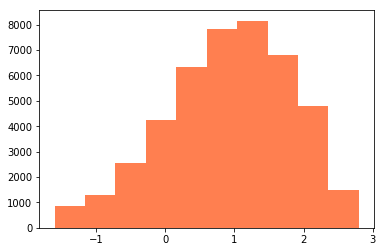

In [39]:
# Distribution of values for distance from cutoff.
print(plt.pyplot.hist(data['dist_from_cut'], color = "coral"))

In [40]:
# Reduce sample to students within 1.2 points from cutoff.
sample12 = data[abs(data['dist_from_cut']) < 1.2] 
sample12.reset_index(inplace=True)
print("A sample of students within 1.2 points from the cuttoff encompasses", sample12.shape[0], "observations.")

A sample of students within 1.2 points from the cuttoff encompasses 25389 observations.


In [41]:
# Reduce sample to students within 0.6 points from cutoff.
sample06 = data[abs(data['dist_from_cut']) < 0.6]  
sample06.reset_index(inplace=True)
print("The final sample includes", sample06.shape[0], "observations.")

The final sample includes 12530 observations.


### Table 1 – Summary Statistics

In [42]:
main = sample06[['hsgrade_pct','totcredits_year1', 'age_at_entry','male', 'english', 'bpl_north_america', 
             'loc_campus1','loc_campus2', 'loc_campus3',
             'dist_from_cut', 'probation_year1', 'probation_ever', 'left_school', 'year2_dist_from_cut',
             'suspended_ever', 'gradin4', 'gradin5', 'gradin6']]

In [43]:
table1 = pd.DataFrame()
table1['Mean'] = main.mean()
table1['Standard Deviation'] = main.std()
#table1 = table1.astype(float).round(2)
table1['Description'] = ["High School Grade Percentile", "Credits attempted first year", "Age at entry",
                         "Male", "English is first language", "Born in North America", 
                         "At Campus 1", "At Campus 2", "At Campus 3",
                         "Distance from cutoff in first year", "On probation after first year", " Ever on acad. probation",
                         "Left uni after 1st evaluation", "Distance from cutoff at next evaluation", "Ever suspended",
                         "Graduated by year  4", "Graduated by year  5", "Graduated by year  6"]
table1.loc[0:9,'Type'] = "Characteristics"
table1.loc[9:,'Type'] = "Outcomes"
table1

,Mean,Standard Deviation,Description,Type
hsgrade_pct,33.332085,23.288502,High School Grade Percentile,Characteristics
totcredits_year1,4.426975,0.530186,Credits attempted first year,Characteristics
age_at_entry,18.718756,0.735240,Age at entry,Characteristics
male,0.375180,0.484199,Male,Characteristics
english,0.718755,0.449625,English is first language,Characteristics
bpl_north_america,0.870231,0.336071,Born in North America,Characteristics
loc_campus1,0.478132,0.499548,At Campus 1,Characteristics
loc_campus2,0.209497,0.406989,At Campus 2,Characteristics
loc_campus3,0.312370,0.463482,At Campus 3,Characteristics
dist_from_cut,0.111093,0.325851,Distance from cutoff in first year,Outcomes


## Empirical Strategy

$Y_{ic} = m(GPANORM_{ic}^{year1}) + \delta1(GPANORM_{ic}^{year1}<0) + u_{ic} $


## Regression Analysis

### Tests of the Validity of the RD Approach

One of the major concerns in the application of regression discontinuity designs is **nonrandom sorting**. In Lindo et al. (2010) such troubles could arise if students just below the cutoff were to actively influence their GPAs to avoid being put on academic probabtion. 

Lindo et al. (2010) focus on _first year students_ for this reason, as they assume this group of students is likely to be less familiar with the probation policy on campus. To verify their conjecture, the author also conducted as survey in an introductory economics course which revealed that around 50 % of students were unsure of the probation cutoff at their campus. They also claim that this analysis showed no relationship between knowledge of probation cutoffs and student's grades. 

The authors also point out that most first year courses span the entire year and most of the evaluation takes place at the end of the term which would make it difficult for students to purposely aim for performances slightly above the cutoff for academic probation. 

If nonrandom sorting were to be a problem nontheless, there should be a **discontinuity** in the distribution of grades at the cutoff with a disproportionate number of students scoring just above the cutoff. To assess the validity of applying an RDD design, we thus first check whether this is the case.

I first sort the data from sample12 (the sample containing all observations within 1.2 GPA points from the cutoff) into bins of size 0.1. The bins contain their lower limit but not their upper limit (i.e. _[lower limit ,upper limit)_): 

<span class="mark">(to be moved to auxilary)</span>

In [44]:
sample_treat = sample12[sample12['dist_from_cut'] < 0]
sample_untreat = sample12[sample12['dist_from_cut'] >= 0]

# Bins for treated group
bins_treat = [-1.21,-1.11,-1.01,-0.91,-0.81,-0.71,-0.61,-0.51,-0.41,-0.31,-0.21,-0.11, -0.01]
bins_labels_treat = np.arange(-1.15,0,0.1)

sample_treat['bins'] = pd.cut(x=sample_treat['dist_from_cut'],bins=bins_treat, right=False, labels= bins_labels_treat )
sample_treat['bins_range'] = pd.cut(x=sample_treat['dist_from_cut'],bins=bins_treat, right=False)
sample_treat[['dist_from_cut','bins','bins_range']]

# Bins for untreated group
bins_untreat = [0.0, 0.099, 0.199, 0.299, 0.399, 0.499, 0.599, 0.699, 0.799, 0.899, 0.999, 1.099, 1.199]
bins_labels_untreat = np.arange(0.05,1.25,0.1)

sample_untreat['bins'] = pd.cut(x=sample_untreat['dist_from_cut'],bins=bins_untreat, right=False, labels= bins_labels_untreat )
sample_untreat['bins_range'] = pd.cut(x=sample_untreat['dist_from_cut'],bins=bins_untreat, right=False)
sample_untreat[['dist_from_cut','bins','bins_range']]

# Rejoin treated and untreated sample 
sample12 = pd.concat([sample_untreat, sample_treat])
sample12.reset_index(inplace=True)

sample12[['dist_from_cut', 'bins', 'bins_range']].head()

C:\Users\arohanui\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\arohanui\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\arohanui\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,dist_from_cut,bins,bins_range
0,0.45,0.45,"[0.399, 0.499)"
1,0.68,0.65,"[0.599, 0.699)"
2,0.84,0.85,"[0.799, 0.899)"
3,0.98,0.95,"[0.899, 0.999)"
4,0.80,0.85,"[0.799, 0.899)"


Plot frequency of each bin & regression line:

In [45]:
figure1 = pd.DataFrame(sample12['bins'].value_counts())
figure1.reset_index(level=0, inplace=True)
figure1.rename(columns={"index": "bins", "bins": "counts"}, inplace=True)

Text(0,0.5,'Frequency count')

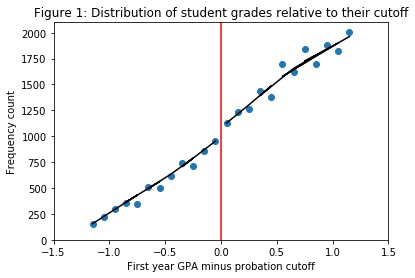

In [46]:
fig1_untreated = figure1[figure1['bins'] > 0]
fig1_treated = figure1[figure1['bins'] < 0]

lowess_treated  = sm.nonparametric.smoothers_lowess.lowess(
        endog=fig1_treated.counts, 
        exog=fig1_treated.bins, 
        return_sorted=False, 
        frac=0.7, 
        delta=0,
    )

lowess_untreated  = sm.nonparametric.smoothers_lowess.lowess(
        endog=fig1_untreated.counts, 
        exog=fig1_untreated.bins, 
        return_sorted=False, 
        frac=0.7, 
        delta=0,
    )

plt.pyplot.xlim(-1.5,1.5,0.1)
plt.pyplot.ylim(0,2100)
plt.pyplot.plot(figure1.bins,figure1.counts, 'o')
plt.pyplot.axvline(x=0, color='r')
plt.pyplot.plot(fig1_untreated.bins,lowess_untreated, "k")
plt.pyplot.plot(fig1_treated.bins,lowess_treated, "k")
plt.pyplot.title('Figure 1: Distribution of student grades relative to their cutoff')
plt.pyplot.xlabel('First year GPA minus probation cutoff')
plt.pyplot.ylabel('Frequency count')

### First year GPAs and Academic Probation

#### Table 2 - Estimated Discontinuities in observable characteristics 

In [74]:
covariates = ['hsgrade_pct','totcredits_year1', 'age_at_entry','male', 'english', 'bpl_north_america', 'loc_campus1','loc_campus2']

In [75]:
table2 = pd.DataFrame({'outputs': ['Intercept', 'Pvalue Intercept', 'GPA below cutoff', 'GPA below cutoff Pvalue', 'Observations']})
table2 = table2.set_index('outputs')

In [76]:
regressors = sample06[['gpalscutoff','gpaXgpalscutoff','gpaXgpagrcutoff']]
regressors = sm.add_constant(regressors)

In [82]:
table2 = pd.DataFrame({'outputs': ['Intercept', 'GPA below cutoff', 'Observations']})
table2 = table2.set_index('outputs')
for covariate in covariates:
    
    result = sm.regression.linear_model.OLS(sample06[covariate], regressors, hasconst=True).fit()
    outputs = [result.params[0], result.params[1], len(sample06[covariate])]   
    table2[covariate] = outputs

table2.round(4)

,hsgrade_pct,totcredits_year1,age_at_entry,male,english,bpl_north_america,loc_campus1,loc_campus2
outputs,,,,,,,,
Intercept,30.9911,4.3859,18.7194,0.3737,0.7292,0.8644,0.4436,0.2172
GPA below cutoff,0.4505,0.0242,0.0151,0.0003,-0.0369,0.0173,0.0121,-0.0098
Observations,12530.0000,12530.0000,12530.0000,12530.0000,12530.0000,12530.0000,12530.0000,12530.0000


#### Figure 2 - Porbation Status at the end of first year